In [1]:
%matplotlib inline
from all_functions import *
from clustering_functions import *

In [2]:
nodenames = np.array(importdata("SP100_20170612.csv")[0].columns)

trees = MST(filename="SP100_20170612.csv", window=100,
            enddate=importdata("SP100_20170612.csv")[0].index[-1].strftime('%Y-%m-%d'),
            startdate='2016-01-04',
            space=1)
sorteddates = sorted(trees.keys(), key=lambda d: map(int, d.split('-')))

IGtrees = {}
for key in sorteddates:
    IGtrees[key] = NXtoIG(trees[key])

all_functions.py:103: RuntimeWarning: divide by zero encountered in log
  log_ret = np.log(df) - np.log(df.shift(1))


In [29]:
ig.arpack_options.maxiter=500000
clustersNewman = {}
clustersClausetNewman = {}
IGclustersNewman = {}
IGclustersClausetNewman = {}
for key in sorteddates:
    C = IGtrees[key].community_leading_eigenvector(weights="weight")
    clustersNewman[key] = list(C)
    IGclustersNewman[key] = C
    for i in range(0,len(C)):
        clustersNewman[key][i] = [IGtrees[key].vs["name"][j] for j in C[i]]
    C = IGtrees[key].community_fastgreedy(weights="weight").as_clustering()
    clustersClausetNewman[key] = list(C)
    IGclustersClausetNewman[key] = C
    for i in range(0,len(C)):
        clustersClausetNewman[key][i] = [IGtrees[key].vs["name"][j] for j in C[i]]

In [12]:
nofclusters = pd.DataFrame(index=sorteddates)
nofclusters['Newman'] = [len(clustersNewman[sorteddates[i]]) for i in range(0,len(sorteddates))]
nofclusters['ClausetNewman']=[len(clustersClausetNewman[sorteddates[i]]) for i in range(0,len(sorteddates))]
print(np.mean(nofclusters))
nofclusters.plot(figsize = (20,8))

In [13]:
labeled = label_clustering_series(clustersClausetNewman, baseline_clustering=baseline, option='baseline',
                                  p_value=0.01)


In [24]:
import csv

with open('alluvial_data.csv', 'wb') as myfile:
    wr = csv.writer(myfile, delimiter=",", quoting=csv.QUOTE_ALL)
    header = ['Stock','Count','Baseline']
    header.extend(sorteddates)
    wr.writerow(header)
    rows = {}
    for s in nodenames:
        rows[s] = []
    for label in baseline.keys():
            for s in baseline[label]:
                rows[s].append(label)
    for t in range(len(sorteddates)):
        for label in labeled[sorteddates[t]].keys():
            for s in labeled[sorteddates[t]][label]:
                rows[s].append(label)
    for s in nodenames:
        row = [s,1]
        row.extend(rows[s])
        wr.writerow(row)

In [4]:
baseline = total_clustering(enddate=sorteddates[-1],startdate=sorteddates[0], method='ClausetNewman')

In [20]:
labeled = label_clustering_series(clustersClausetNewman,baseline_clustering=baseline,
                                  option = 'baseline', p_value=0.01)

In [38]:
IGtrees['2016-01-05'].subgraph(IGclustersClausetNewman['2016-01-05'][0]).diameter(directed=False,
                                                                                  unconn=False,
                                                                                  weights="weight")


3.4627719623334947

In [69]:
def find_cluster_diameter(labeling, trees, IGclusters, cluster_label):
    sorteddates = sorted(labeling.keys(), key=lambda d: map(int, d.split('-')))
    result = {}
    for t in sorteddates:
        try:
            rep_stock = labeling[t][cluster_label][0]
            for i in range(len(labeling[t])):
                if rep_stock in trees[t].subgraph(IGclusters[t][i]).vs["name"]:
                    result[t] = trees[t].subgraph(IGclusters[t][i]).diameter(directed=False, unconn=False,
                                                                             weights="weight")
                    break
        except:
            result[t] = np.nan
    return result

In [ ]:
def average_cluster_diameter(trees, IGclusters):
    sorteddates = sorted(trees.keys(), key=lambda d: map(int, d.split('-')))
    result = {}
    for t in sorteddates:
        result[t] = trees[t].subgraph(IGclusters[t][i]).\
            diameter(directed=False, unconn=False, weights="weight")

In [45]:
labeled['2016-01-05'][2]

['BK',
 'GE',
 'T',
 'WFC',
 'KBE',
 'QCOM',
 'UPS',
 'MA',
 'XLF',
 'V',
 'XTN',
 'KRE',
 'MET',
 'USB',
 'FDX',
 'AIG',
 'VZ']

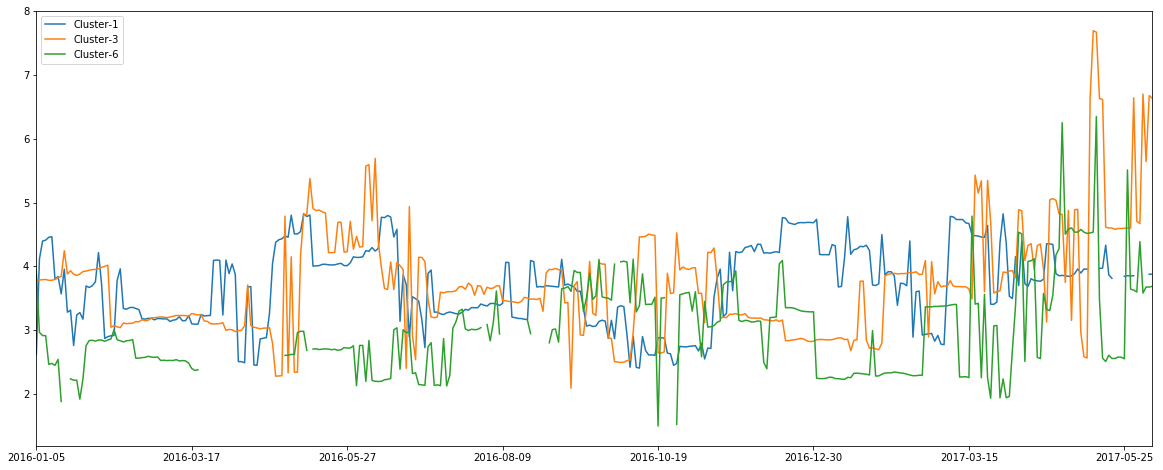

In [70]:
cluster_diameter = pd.DataFrame(index=sorteddates)
cluster_diameter['Cluster-1'] = pd.Series(find_cluster_diameter(labeled, IGtrees,
                                                                IGclustersClausetNewman, 1))
cluster_diameter['Cluster-3'] = pd.Series(find_cluster_diameter(labeled, IGtrees,
                                                                IGclustersClausetNewman, 3))
cluster_diameter['Cluster-6'] = pd.Series(find_cluster_diameter(labeled, IGtrees,
                                                                IGclustersClausetNewman, 6))
cluster_diameter['Cluster-8'] = pd.Series(find_cluster_diameter(labeled, IGtrees,
                                                                IGclustersClausetNewman, 8))
% matplotlib inline
cluster_diameter.loc[:, ['Cluster-1', 'Cluster-3', 'Cluster-6']].plot(figsize=(20, 8))

In [64]:
s = pd.Series(find_cluster_diameter(labeled, IGtrees, IGclustersClausetNewman,1), name='Cluster-1')
s

2016-01-05    2.615370
2016-01-06    4.116857
2016-01-07    4.397170
2016-01-08    4.411571
2016-01-11    4.456739
2016-01-12    4.465475
2016-01-13    3.798110
2016-01-14    3.842056
2016-01-15    3.570029
2016-01-19    3.956478
2016-01-20    3.282982
2016-01-21    3.313323
2016-01-22    2.761261
2016-01-25    3.239882
2016-01-26    3.276206
2016-01-27    3.172929
2016-01-28    3.694110
2016-01-29    3.669569
2016-02-01    3.697663
2016-02-02    3.757397
2016-02-03    4.217799
2016-02-04    3.717615
2016-02-05    2.872198
2016-02-08    2.899099
2016-02-09    2.913696
2016-02-10    2.917288
2016-02-11    3.781645
2016-02-12    3.961946
2016-02-16    3.340543
2016-02-17    3.329794
                ...   
2017-04-27    3.859340
2017-04-28    3.855372
2017-05-01    3.844515
2017-05-02    3.849411
2017-05-03    3.886572
2017-05-04    3.960093
2017-05-05    3.896624
2017-05-08    3.959207
2017-05-09    3.956909
2017-05-10    0.000000
2017-05-11    0.000000
2017-05-12    0.000000
2017-05-15 

In [65]:
cluster_diameter = pd.DataFrame(index=sorteddates)
cluster_diameter['Cluster-1'] = s

In [66]:
cluster_diameter

,Cluster-1
2016-01-05,2.615370
2016-01-06,4.116857
2016-01-07,4.397170
2016-01-08,4.411571
2016-01-11,4.456739
2016-01-12,4.465475
2016-01-13,3.798110
2016-01-14,3.842056
2016-01-15,3.570029
2016-01-19,3.956478


In [40]:
IGtrees['2016-01-05'].subgraph(IGclustersClausetNewman['2016-01-05'][0]).vs["name"]

['UTX',
 'NSC',
 'BA',
 'XAR',
 'KIE',
 'XLB',
 'MMM',
 'MON',
 'DOW',
 'UNP',
 'ALL',
 'DD',
 'HON']